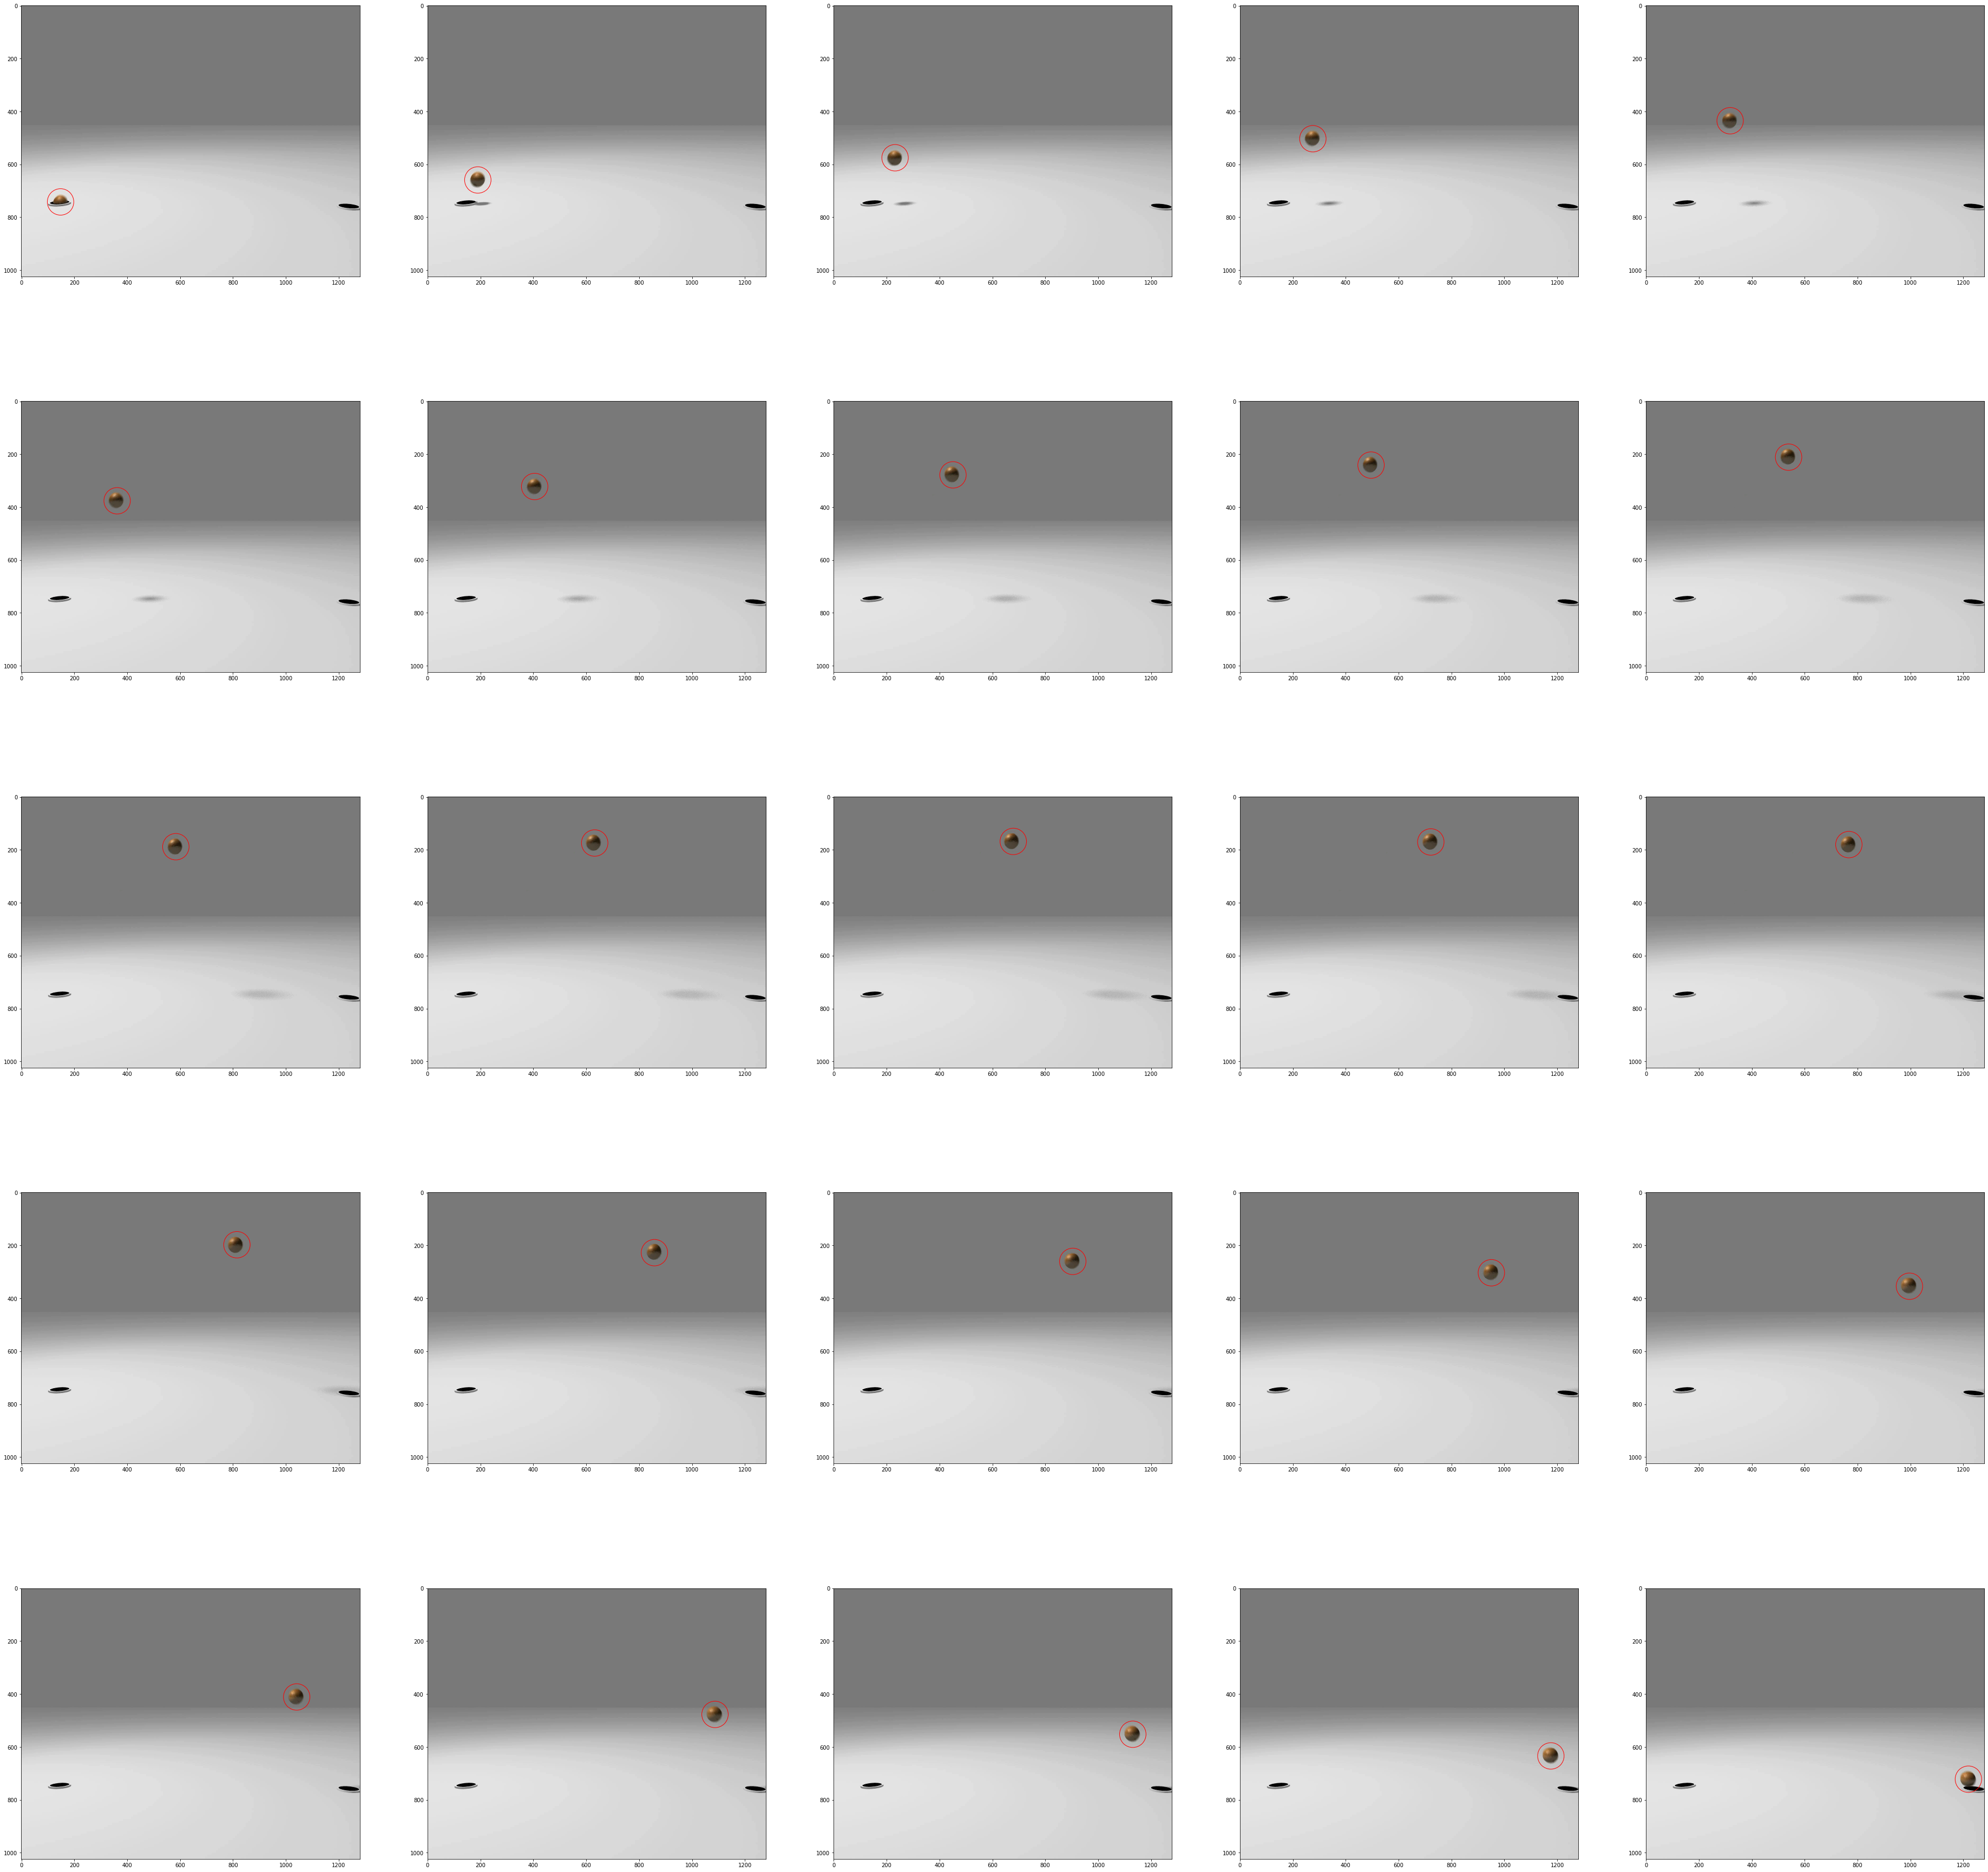

In [165]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
import IPython.display as display
import time
import os 
import re

coor_matrix = [] #creates a matrix that will hold our matrix coordinates
coor = open('coordinates.csv', 'r') #opens file with coordinates
for line in coor: 
    line_list = []
    for word in line.split(','): #splits coordinates based on comma
        line_list.append(int(word)) #adds x then y
    coor_matrix.append(line_list)
np.matrix(coor_matrix) #creates matrix of our coordinates 
#print(coor_matrix)


regex = re.compile(r'\d+') #used to identify integer in file names

plt.figure(figsize = (65,65)) #sets figure size in the beginning

file_names = []

filelist = os.listdir('frames/') #reads directory
for file in filelist: #goes through each file
    file_names.append(file) #adds file name so we can reference it last
    num = int(regex.search(file).group(0)) #finds number in the file name
    ax = plt.subplot(5,5,num) #creates subplot using file number
    img = plt.imread('frames/'+file) #adds image to subplot
    size = img.shape
    ax.imshow(img)
    circ = plt.Circle((coor_matrix[num-1][0],coor_matrix[num-1][1]), 50, color = 'r', fill = False) #creates circle
    ax.add_patch(circ)
plt.show()

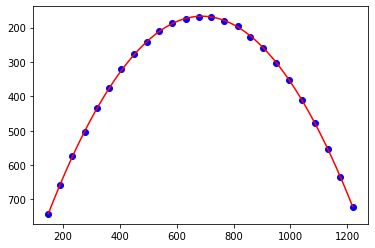

In [166]:
x = [i[0] for i in coor_matrix] #sets xi to first element of each sub-list in coor_matrix 
y = [i[1] for i in coor_matrix] #sets yi to second element of each sub-list in coor_matrix 

X = np.stack( (np.square(x), x, np.ones((len(x)))), axis=1) #turns our x's into a matrix for our matrix multiplication
u = inv(np.transpose(X)@X)@np.transpose(X)@y # Calculates least squares using X transpose * X * X tranpose * yi

plt.plot(x,y,'bo') # original data
xp = np.arange(x[0],x[-1],0.1) #sets xp to many subpoints
yp = u[0]*xp*xp + u[1]*xp + u[2]
plt.plot( xp, yp, 'r-' ) # second-order polynomial fit
plt.gca().invert_yaxis()

plt.show()

#coor_matrix 

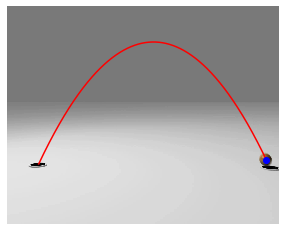

In [168]:
for i in range(len(filelist)):
    plt.plot( xp, yp, 'r-' ) # second-order polynomial fit
    plt.plot( x[i], y[i], 'bo' ) #plot x,y coordinates for each spot
    plt.gca().invert_yaxis() #flip so parabola will be right way
    img=plt.imread('frames/frame'+ str(i+1) + '.png') #open file in order
    plt.imshow(img)
    plt.axis('off')    
    plt.show()
    
    time.sleep(0.5)
    display.clear_output(wait=True)